In [ ]:
import pandas as pd
import nltk
import random as rand

In [ ]:
data = pd.read_csv("/content/CleanedTapasData.csv")

data.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,july comic challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,though wait motivationim starting july challen...,hi gabriella july challenge working continuing...,july comic challenge get stuff done some thoug...
1,march comic madness contest final result,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray march madness contest close winner deci...,congrats everyone flattered piece excited judg...,march comic madness contest final result hoora...
2,comic page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,simple sound everyday upload next strip visual...,let start acroalis acroalis acroalis fantasy e...,your comic here page per day thread simple sou...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done wanted community august th uploading t...,fun count btw enter send youand select image w...,draw panel style event prize hi done before wa...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,adorable congratulation winning pride contest ...,pride contest yay yay whenever enter contest i...


In [ ]:
data.groupby(["Category"]).size()

Category
Art | Comics                    1006
Collaborations                   839
Events | Challenges              619
Off Topic                       1005
Promotions                       977
Questions                       1027
Reviews | Feedback               677
Tech Support | Site Feedback     953
Writing | Novels                 999
dtype: int64

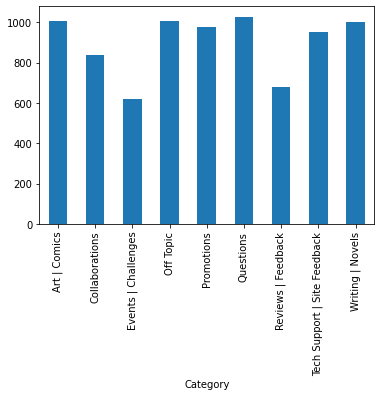

In [ ]:
data.groupby(["Category"]).size().plot.bar()

In [ ]:
groups = data.groupby(["Category"])
groups.head(1)

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,july comic challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,though wait motivationim starting july challen...,hi gabriella july challenge working continuing...,july comic challenge get stuff done some thoug...
619,tapa adventuring rp,Off Topic,"Nov 28, 2020 12:45 am",8,17800,24300,hey mood roleplaying present adventuring rp no...,created thread set adventurefeel free enter sc...,tapa adventuring rp hey mood roleplaying again...
1624,new help section new creator looking refresher,Art | Comics,"Jul 23, 2020 10:41 am",22,11,823,premium somethings popular trending,isabell went section found quite helpful stuff...,new help section new creator and looking refre...
2630,tapa paster novelist miqinviolin,Writing | Novels,"Dec 15, 2020 3:26 pm",17,6,399,violin fcking legend nothing say convince othe...,big thanks violin violin format future bless v...,tapa paster novelist miqinviolin violin fcking...
3629,action scifi series share away ill check,Reviews | Feedback,"Oct 8, 2020 7:50 am",21,132,1100,action scifi genre smaller compared otherspart...,oh scifi action genre scifi action thrillercur...,have action scifi series share away ill check ...
4306,submitting collaboration request,Collaborations,"Mar 3, 2020 11:35 am",29,7,3700,hey amazing recommendation change thanks expla...,thanks check post change anything whats differ...,before submitting collaboration request hey am...
5145,doe anyone use comicad network,Questions,"Feb 10, 2021 7:54 am",2,7,225,grow audience knowcomicad place advertise game...,next best project wonderful ended giving inves...,doe anyone use comicad network grow audience k...
6172,bug early access comic dont remember place,Tech Support | Site Feedback,"Feb 25, 2021 10:24 am",1,5,120,month amount data notification early access su...,sort fix applied affected secondmostrecent upd...,bug early access comic dont remember place mon...
7125,milestone party mega thread killed one,Promotions,"Sep 15, 2020 2:41 pm",52,586,7200,hello folk cut surplus milestone celebration t...,fang fractal paranormal romance vampire reveng...,milestone party mega thread that killed one he...


In [ ]:
events_and_challenges = groups.get_group("Events | Challenges")
events_and_challenges.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            609, 610, 611, 612, 613, 614, 615, 616, 617, 618],
           dtype='int64', length=619)

In [ ]:
def post_fuse(category):
  return category["Post"][rand.randint(0, len(category) - 1)] + " " + category["Post"][rand.randint(0, len(category) - 1)] + category["Title"][rand.randint(0, len(category) - 1)]

In [ ]:
pre_df = [pd.DataFrame({column:(post_fuse(events_and_challenges) if column == "Post" else "Events | Challenges" if column == "Category" else None) for column in list(data.columns)}, index=[i]) for i in range(300)]

In [ ]:
pre_df.append(events_and_challenges)
events_and_challenges = pd.concat(pre_df, ignore_index=True)
events_and_challenges["Post"][5]

'describe room create comic might fun ridiculous amount drawer store favourite graphic collection random toy poster which largely seem star war related design backyard neighbour nothing exceptional right currently dark raining heavy rain bouncing garden shed x poster wall graphic shelf desk working computer drawing hand paper everywhere swimming yet now wreck various stuff junk haha yeah room quite messy too spent afternoon today whilst listening film soundtrack lol meant clean chain chain serial killer type chain hook them standard gardenvariety jacob marley style chain messy mail various paper clothes movie lying around clothes cleaned put away coz havent yet working stuff massively behind part lie bed lazy today part nudging stuff done tv regular computer screen laptop cintiq connected laptop sitting old wooden desk bought second hand shop wooden kitchen chair close old area immaculate rest room covered miscellaneous trash old bill clothes whatever else assed place for home carpet c

In [ ]:
reviews_and_feedback = groups.get_group("Reviews | Feedback")
reviews_and_feedback = reviews_and_feedback.reset_index(drop=True)

In [ ]:
pre_df = [pd.DataFrame({column:(post_fuse(reviews_and_feedback) if column == "Post" else "Reviews | Feedback" if column == "Category" else None) for column in list(data.columns)}, index=[i]) for i in range(300)]

In [ ]:
pre_df.append(reviews_and_feedback)
reviews_and_feedback = pd.concat(pre_df, ignore_index=True)
reviews_and_feedback["Category"][5]

'Reviews | Feedback'

In [ ]:
data = data.drop(data[data["Category"] == "Events | Challenges"].index)
data = data.drop(data[data["Category"] == "Reviews | Feedback"].index)

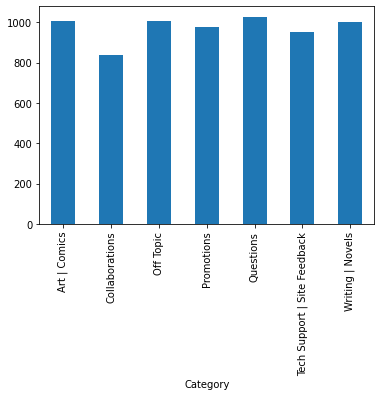

In [ ]:
data.groupby(["Category"]).size().plot.bar()

In [ ]:
new_df = [data, events_and_challenges, reviews_and_feedback]
data = pd.concat(new_df, ignore_index=True)
data.reset_index(drop=True)

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,tapa adventuring rp,Off Topic,"Nov 28, 2020 12:45 am",8,17800,24300,hey mood roleplaying present adventuring rp no...,created thread set adventurefeel free enter sc...,tapa adventuring rp hey mood roleplaying again...
1,le château de malheureux ddd,Off Topic,"Aug 14, 2020 3:20 pm",5,19900,35100,welcome dungeon ding dong private murder myste...,name carole losnedahlage ft specie angel sorta...,le château de malheureux ddd welcome dungeon d...
2,writer paid collabs,Off Topic,"Jul 22, 2021 4:40 pm",0,1,11,hello enquire collabs script tell adapt either...,rate artist pay adapt,writer paid collabs how it hello enquire colla...
3,fantasy book unique worldbuilding,Off Topic,"Jul 22, 2021 2:24 pm",5,3,39,found featured article worldbuilding huge fan ...,awesome done must pretty wild featured alongsi...,fantasy book unique worldbuilding found featur...
4,game playing right,Off Topic,"Nov 10, 2019 1:34 pm",13,1000,10600,video game board game hand held game puzzle ga...,simplykit video game fire emblem enjoying micr...,what game playing right now video game board g...
...,...,...,...,...,...,...,...,...,...
8697,hero world comic hero,Reviews | Feedback,"Aug 14, 2015 12:52 pm",0,2,618,hi forumim called hero pen beatthis promoting ...,welcome party pfabdn put link post user profil...,hero world comic hero hi forumim called hero p...
8698,review category,Reviews | Feedback,"Jul 22, 2015 2:10 pm",1,5,1500,request provide feedback review content,understand whats exactly happening guess asked...,about review category request provide feedback...
8699,trade review fir review,Reviews | Feedback,"Jul 20, 2015 9:01 pm",0,4,710,hey webtooncomic called skywardand quickfeed p...,hey nice opening although blurry squint eye sc...,trade review fir review hey webtooncomic calle...
8700,critique exchange,Reviews | Feedback,"Jul 4, 2015 6:12 pm",1,55,2300,hey offering critique exchange honest critique...,yo awesome simon nero nine style reminds old b...,critique exchange hey offering critique exchan...


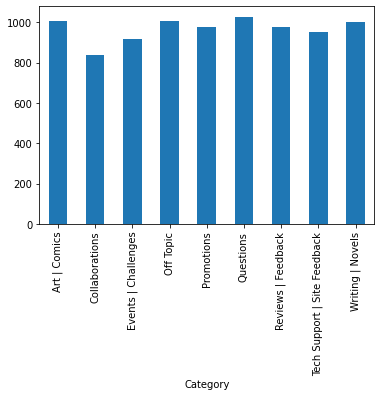

In [ ]:
data.groupby(["Category"]).size().plot.bar()

In [ ]:
# data.to_csv("AdjustedCleanTapasData.csv", encoding="utf-8", index=False)